## Building an **`Image Classifier`** using the **`TensorFlow Sequential API`**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


## Loading the Dataset using Keras

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print("X train shape: ", X_train_full.shape)
print("y train shape: ", y_train_full.shape)
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X train shape:  (60000, 28, 28)
y train shape:  (60000,)
X test shape:  (10000, 28, 28)
y test shape:  (10000,)


**Important**
- Unlike the MNIST Dataset provided by Scikit-Learn this dataset has a different representation for its images.
- The data corresponding to each instance of the dataset is already ordered in the shape of a matrix of size 28 x 28.

In [4]:
print("Datatype used: ", X_train_full.dtype)
print("Datatype used: ", y_train_full.dtype)

Datatype used:  uint8
Datatype used:  uint8


**Important**
- Unlike the MNIST Dataset provided by Scikit-Learn where the target were strings this dataset has all its targets as integers.

In [5]:
# Creating a Validation Set and Scaling the Inputs
X_train, X_valid = X_train_full[:-5000] / 255, X_train_full[-5000:] / 255
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [6]:
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("X valid shape: ", X_valid.shape)
print("y valid shape: ", y_valid.shape)
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X train shape:  (55000, 28, 28)
y train shape:  (55000,)
X valid shape:  (5000, 28, 28)
y valid shape:  (5000,)
X test shape:  (10000, 28, 28)
y test shape:  (10000,)


**Target Classes in Fashion Mnist**

In [7]:
target_classes = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

## Viewing the Images

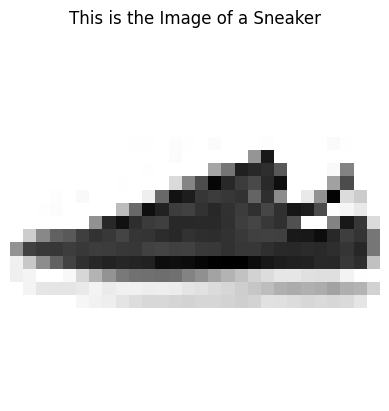

In [8]:
import matplotlib.pyplot as plt

# Index of the Image
index = 6

plt.title(f"This is the Image of a {target_classes[y_train[index]]}")
plt.imshow(X_train[index, :, :], cmap="binary")
plt.axis("off")
plt.show()

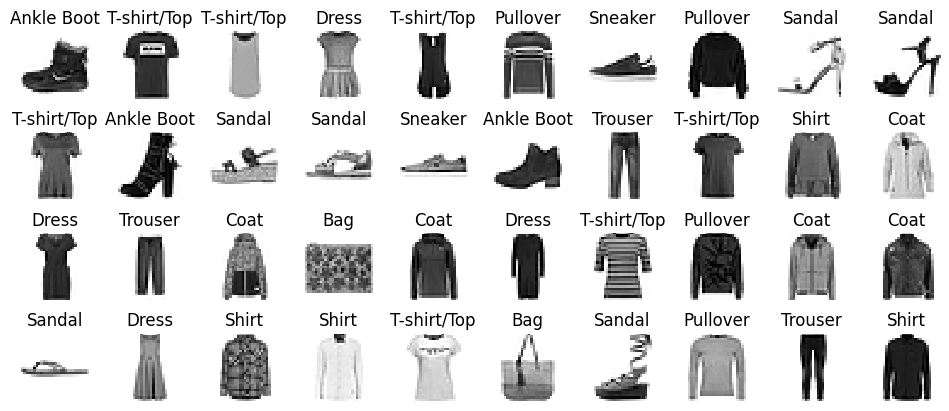

<Figure size 640x480 with 0 Axes>

In [9]:
n_rows, n_cols = 4, 10

# Adjusting the Plot Layout
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

# Plotting the Images
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.title(target_classes[y_train[index]])
        plt.axis("off")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
plt.savefig("Fashion_MNIST.jpg")

## Building the Model (Classification)

In [10]:
# Random State to Replicate Outputs
tf.keras.backend.clear_session()
tf.random.set_seed(1730)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


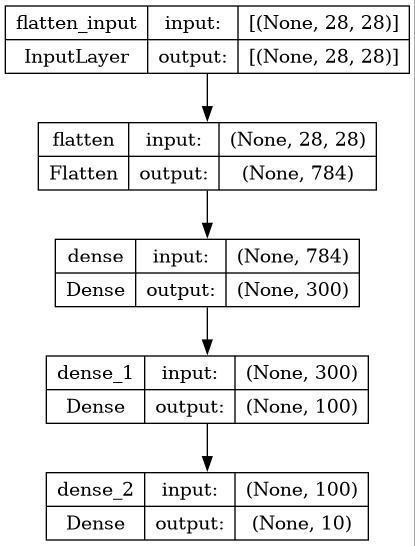

In [11]:
# Another way to view the model architecture
tf.keras.utils.plot_model(model, "fashion_model.jpg", show_shapes=True)

In [12]:
# Accessing the Layers of the Model
model.layers

In [13]:
hidden1 = model.layers[1]
model.get_layer("dense") is hidden1

True

**Important**
- Each layer of the Model can also be accessed by its name when given during the initialisation of the model

In [14]:
# Accessing the Weights and Biases
weights, biases = hidden1.get_weights()

print("Weight Matrix: ", weights.shape)
print(weights)
print("\nBias Vector: ", biases.shape)
print(biases)

Weight Matrix:  (784, 300)
[[-0.07172722 -0.00541679 -0.06540449 ... -0.02433901  0.04671221
  -0.03923509]
 [ 0.00770811 -0.04780442 -0.01089814 ...  0.03832671 -0.01270061
   0.06725813]
 [ 0.04909256 -0.06496549 -0.05571415 ... -0.04907075  0.03956856
   0.0398147 ]
 ...
 [-0.07387729 -0.06516286 -0.04272519 ...  0.02073438  0.0555519
  -0.06326601]
 [ 0.06860749 -0.02371123  0.07339713 ...  0.02287421  0.01569646
  -0.03233082]
 [-0.00434742 -0.05882725 -0.07346267 ... -0.01820303  0.07374355
   0.00950222]]

Bias Vector:  (300,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 

**Important**
- Weight Matrix is Randomly Initialised to break the problem of Symmetry in the intial stages of learning.
- The initialisation method used for generation of Weight Matrix and Bias Matrix can be modified by changing the parameters of `Kernel Initialiser` and `Bias Initialiser`.

## Compiling the Model (Classification)

In [15]:
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="sgd"
)

## Training

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7165 - accuracy: 0.7707 - val_loss: 0.5064 - val_accuracy: 0.8290
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4886 - accuracy: 0.8315 - val_loss: 0.4740 - val_accuracy: 0.8336
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4442 - accuracy: 0.8459 - val_loss: 0.4581 - val_accuracy: 0.8410
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4158 - accuracy: 0.8552 - val_loss: 0.4041 - val_accuracy: 0.8574
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3971 - accuracy: 0.8613 - val_loss: 0.3946 - val_accuracy: 0.8616
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3796 - accuracy: 0.8675 - val_loss: 0.3747 - val_accuracy: 0.8674
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3667 - accuracy: 0.8716 - val_loss: 0.3925 - val_accuracy:

**Viewing the Learning Curve**

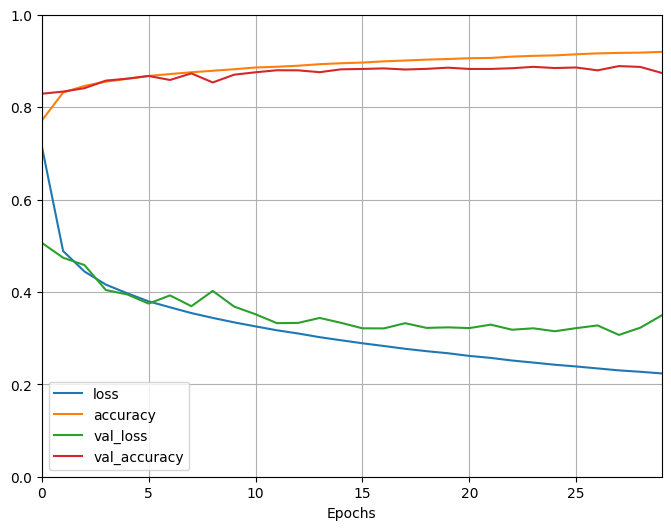

In [17]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 6), ylim=[0, 1], xlim=[0, 29], grid=True, xlabel="Epochs"
)

plt.show()

**Inference**
- The Validation and Training curves are following similar trends without much deviation.
- Thus the model isnt overfitting but there is scope for improved performance.

## Testing

In [18]:
# Scaling the Test Inputs
X_test = X_test / 255

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3607 - accuracy: 0.8691


[0.36068716645240784, 0.8690999746322632]

## Making Predictions (Classification)

In [20]:
# Making predictions on the first five cases of the Test Set
X_pred = X_test[:5]

# Acquiring the Probabilites after passing through Softmax
y_prob = model.predict(X_pred)
y_prob.round(2)

1/1 [==============================] - 0s 89ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.02, 0.  , 0.  , 0.  , 0.94, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [21]:
import numpy as np

# Converting the Probabilities to Classes
y_pred = np.argmax(y_prob, axis=1)
y_pred

array([9, 2, 1, 1, 6])

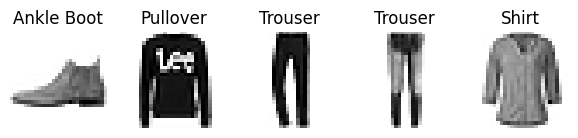

<Figure size 640x480 with 0 Axes>

In [22]:
# Adjusting the Plot
plt.figure(figsize=(7.2, 2.4))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i], cmap="binary", interpolation="nearest")
    plt.title(target_classes[y_pred[i]])
    plt.axis("off")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
plt.savefig("Predictions")

**Inference**
- Atleast it got the first 5 predictions rt 😌
- Scope for improving performance by hyper parameter tuning and implementing CNNs

## Building a **`House Price Prediction (Regression)`** using the **`TensorFlow Sequential API`**

## Loading the Dataset

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
housing = fetch_california_housing()

# Splitting the Dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

# Creating the Validation Set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [25]:
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("X valid shape: ", X_valid.shape)
print("y valid shape: ", y_valid.shape)
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X train shape:  (11610, 8)
y train shape:  (11610,)
X valid shape:  (3870, 8)
y valid shape:  (3870,)
X test shape:  (5160, 8)
y test shape:  (5160,)


In [26]:
# Scaling the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

## Building the Model (Regression)

In [27]:
tf.random.set_seed(1730)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                450       
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3051 (11.92 KB)
Trainable params: 3051 (11.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compiling the Model (Regression)

In [28]:
model.compile(
    loss="mse",
    optimizer="adam",
    metrics=["RootMeanSquaredError"]
)

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30)

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.9204 - root_mean_squared_error: 0.9594 - val_loss: 0.4308 - val_root_mean_squared_error: 0.6563
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4230 - root_mean_squared_error: 0.6504 - val_loss: 0.4238 - val_root_mean_squared_error: 0.6510
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3913 - root_mean_squared_error: 0.6255 - val_loss: 0.5239 - val_root_mean_squared_error: 0.7238
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3766 - root_mean_squared_error: 0.6137 - val_loss: 0.5475 - val_root_mean_squared_error: 0.7400
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3637 - root_mean_squared_error: 0.6031 - val_loss: 0.5750 - val_root_mean_squared_error: 0.7583
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3489 - root_mean_squared_error: 0.5907 - val_loss: 0.5993 - val_

## Making Predictions (Regression)

In [30]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3931 - root_mean_squared_error: 0.6270


[0.39312127232551575, 0.6269938349723816]

In [31]:
X_pred = X_test[:5]
y_pred = model.predict(X_pred)
print("\nPredictions:\n", y_pred)
print("\nTargets:\n", y_test[:5])

1/1 [==============================] - 0s 53ms/step

Predictions:
 [[4.066341 ]
 [1.9812613]
 [1.8310211]
 [2.3200588]
 [2.124248 ]]

Targets:
 [3.216 1.295 2.865 2.741 2.594]


**Inference**
- Seems pretty close 😌
- Can yeild better results with hyperparameter tuning 

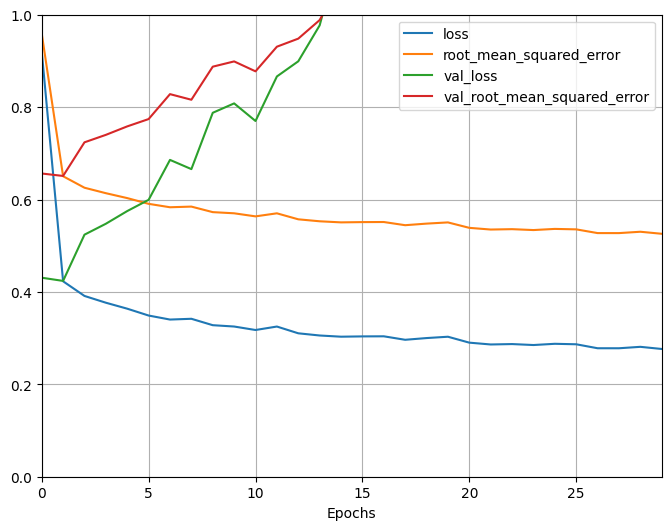

In [32]:
pd.DataFrame(history.history).plot(
    figsize=(8, 6), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epochs"
)

plt.show()